In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cta_fake.fit', delim_whitespace=True, header=None)

In [3]:
data

,0,1,2,3,4,5
0,0,N,-4.49830,-0.90118,4.49948,100.0
1,1,C,-1.80563,0.04058,1.79780,20.0
2,2,C,0.82445,-0.78343,-0.93130,20.0
3,3,C,3.76339,-0.09161,-3.36093,20.0


In [4]:
data[2] = data[2] - data[2].min()
data[3] = data[3] - data[3].min()
data[4] = data[4] - data[4].min()

In [5]:
data

,0,1,2,3,4,5
0,0,N,0.00000,0.00000,7.86041,100.0
1,1,C,2.69267,0.94176,5.15873,20.0
2,2,C,5.32275,0.11775,2.42963,20.0
3,3,C,8.26169,0.80957,0.00000,20.0


In [6]:
import numpy as np

def rotation(a, b, c, d, e, f, data):
    l = np.sin(a) * np.cos(b)
    m = np.sin(a) * np.sin(b)
    n = np.cos(a)
    k = c
    rm = np.zeros((3,3))
    rm[0][0] = l * l + (m * m + n * n) * np.cos(k)
    rm[0][1] = l * m * (1 - np.cos(k)) - n * np.sin(k)
    rm[0][2] = n * l * (1 - np.cos(k)) + m * np.sin(k)
    rm[1][0] = l * m * (1 - np.cos(k)) + n * np.sin(k)
    rm[1][1] = m * m + (n * n + l * l) * np.cos(k)
    rm[1][2] = m * n * (1 - np.cos(k)) - l * np.sin(k)
    rm[2][0] = n * l * (1 - np.cos(k)) - m * np.sin(k)
    rm[2][1] = m * n * (1 - np.cos(k)) + l * np.sin(k)
    rm[2][2] = n * n + (l * l + m * m) * np.cos(k)
    x = rm[0][0] * data[2] + rm[0][1] * data[3] + rm[0][2] * data[4] + d
    y = rm[1][0] * data[2] + rm[1][1] * data[3] + rm[1][2] * data[4] + e 
    z = rm[2][0] * data[2] + rm[2][1] * data[3] + rm[2][2] * data[4] + f
    return x, y, z

In [7]:
file_open = open('output.xyz', 'w')
file_open.write('16\n#comment\n')
d = [0, 0, 0, 20]
e = [0, 20, 20, 20]
f = [0, 0, 20, 20]

for l, i in enumerate(np.linspace(0, 2 * np.pi, 4)):
    k = rotation(np.pi, np.pi, i, d[l], e[l], f[l], data)
    for j in range(0, 4):
        file_open.write('{} {} {} {}\n'.format(data[1][j], k[0][j], k[1][j], k[2][j]))
file_open.close()

In [44]:
np.linspace(0, 2 * np.pi, 4)

array([0.        , 2.0943951 , 4.1887902 , 6.28318531])

In [8]:
data2 = pd.read_csv('output.xyz', delim_whitespace=True, header=None, skiprows=2)

In [9]:
data2[1] = data2[1] - data2[1].min()
data2[2] = data2[2] - data2[2].min()
data2[3] = data2[3] - data2[3].min()

In [10]:
data2

,0,1,2,3
0,N,4.831953,0.000000,7.860410e+00
1,C,7.524623,0.941760,5.158730e+00
2,C,10.154703,0.117750,2.429630e+00
3,C,13.093643,0.809570,0.000000e+00
4,N,4.831953,20.000000,7.860410e+00
5,C,4.301206,17.197199,5.158730e+00
6,C,2.272553,15.331488,2.429630e+00
7,C,1.402216,12.440382,1.431787e-15
8,N,4.831953,20.000000,2.786041e+01
9,C,2.670030,21.861041,2.515873e+01


In [28]:
qs = np.linspace(0.1, 1, 100)
qs

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [29]:
print(data2[0][0])

N


In [30]:
intensity = np.zeros_like(qs)
for e, q in enumerate(qs):
    for m in range(0, data2[1].size-1):
        for n in range(m+1, data2[1].size):
            bi = data.values[data[1] == data2[0][m]][0][5]
            bj = data.values[data[1] == data2[0][n]][0][5]
            xdist = data2[1][n] - data2[1][m]
            ydist = data2[2][n] - data2[2][m]
            zdist = data2[3][n] - data2[3][m]
            r_mn = np.sqrt(np.square(xdist) + np.square(ydist) + np.square(zdist))
            intensity[e] += bi * bj * np.sin(
                r_mn * q) / (r_mn * q)
    if intensity[e] < 0:
        intensity[e] = 0

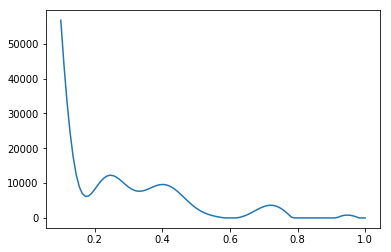

In [31]:
import matplotlib.pyplot as plt

plt.plot(qs, intensity)
plt.show()

In [37]:
file_open = open('fake_data.txt', 'w')

In [38]:
for i in range(qs.size):
    if intensity[i] != 0:
        file_open.write('{} {} {}\n'.format(qs[i], intensity[i], intensity[i]*0.0001))

In [39]:
file_open.close()

In [36]:
intensity

array([5.67285786e+04, 4.43011000e+04, 3.35633125e+04, 2.46682831e+04,
       1.76603665e+04, 1.24829359e+04, 8.99196571e+03, 6.97414751e+03,
       6.16796411e+03, 6.28601880e+03, 7.03693107e+03, 8.14525154e+03,
       9.36810448e+03, 1.05076081e+04, 1.14185195e+04, 1.20109663e+04,
       1.22485278e+04, 1.21422781e+04, 1.17416829e+04, 1.11234227e+04,
       1.03792960e+04, 9.60433427e+03, 8.88613858e+03, 8.29625451e+03,
       7.88414734e+03, 7.67405734e+03, 7.66473001e+03, 7.83175349e+03,
       8.13201892e+03, 8.50966425e+03, 8.90277871e+03, 9.25013663e+03,
       9.49729045e+03, 9.60147340e+03, 9.53492631e+03, 9.28645233e+03,
       8.86119663e+03, 8.27882744e+03, 7.57044269e+03, 6.77463055e+03,
       5.93316504e+03, 5.08681745e+03, 4.27171413e+03, 3.51657940e+03,
       2.84108133e+03, 2.25536168e+03, 1.76069518e+03, 1.35110120e+03,
       1.01563561e+03, 7.41030407e+02, 5.14328351e+02, 3.25180203e+02,
       1.67528399e+02, 4.04862888e+01, 0.00000000e+00, 0.00000000e+00,
      

In [41]:
ll = np.array([[56728.578125, 0.100000],
[52099.503906, 0.109091],
[48208.140625, 0.118182],
[45013.953125, 0.127273],
[42433.273438, 0.136364],
[40354.890625, 0.145455],
[38655.648438, 0.154545],
[37215.003906, 0.163636],
[35926.703125, 0.172727],
[34706.824219, 0.181818],
[33497.984375, 0.190909],
[32269.730469, 0.200000],
[31015.648438, 0.209091],
[29748.394531, 0.218182],
[28493.355469, 0.227273],
[27282.142578, 0.236364],
[26146.587891, 0.245455],
[25114.136719, 0.254545],
[24204.576172, 0.263636],
[23428.482422, 0.272727],
[22787.187500, 0.281818],
[22273.648438, 0.290909],
[21874.232422, 0.300000],
[21570.787109, 0.309091],
[21342.703125, 0.318182],
[21168.769531, 0.327273],
[21028.656250, 0.336364],
[20904.101562, 0.345455],
[20779.654297, 0.354545],
[20643.181641, 0.363636],
[20486.177734, 0.372727],
[20303.900391, 0.381818],
[20095.384766, 0.390909],
[19863.242188, 0.400000],
[19613.384766, 0.409091],
[19354.429688, 0.418182],
[19096.945312, 0.427273],
[18852.542969, 0.436364],
[18632.748047, 0.445455],
[18447.947266, 0.454545],
[18306.363281, 0.463636],
[18213.263672, 0.472727],
[18170.457031, 0.481818],
[18176.179688, 0.490909],
[18225.298828, 0.500000],
[18309.865234, 0.509091],
[18419.886719, 0.518182],
[18544.218750, 0.527273],
[18671.392578, 0.536364],
[18790.417969, 0.545455],
[18891.291016, 0.554545],
[18965.373047, 0.563636],
[19005.460938, 0.572727],
[19005.796875, 0.581818],
[18298.062500, 0.627273],
[18009.902344, 0.636364],
[17678.689453, 0.645455],
[17311.005859, 0.654545],
[16915.777344, 0.663636],
[16504.142578, 0.672727],
[16089.097656, 0.681818],
[15684.899414, 0.690909],
[15306.214844, 0.700000],
[14967.164062, 0.709091],
[14680.354492, 0.718182],
[14455.899414, 0.727273],
[14300.687500, 0.736364],
[14217.801758, 0.745455],
[14206.298828, 0.754545],
[14261.271484, 0.763636],
[14374.182617, 0.772727],
[14533.459961, 0.781818],
[14691.379883, 0.918182],
[14452.105469, 0.927273],
[14224.655273, 0.936364],
[14018.753906, 0.945455],
[13842.067383, 0.954545],
[13699.758789, 0.963636],
[13594.277344, 0.972727],
[13525.424805, 0.981818]])

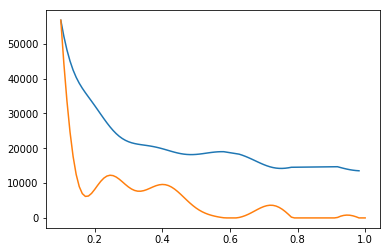

In [43]:
plt.plot(ll[:, 1], ll[:, 0])
plt.plot(qs, intensity)


plt.show()